In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



from sklearn.linear_model  import LinearRegression
from sklearn.svm import SVR


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer


from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_predict,RandomizedSearchCV,validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
#from skopt import BayesSearchCV

from hyperopt import hp, fmin, tpe, STATUS_OK, Trials,rand
from hyperopt.pyll.base import scope 

def mae(y_orig,y_pred):
    abs_error = abs(y_orig-y_pred)
    return (np.mean(abs_error) / np.mean(y_orig))*100
def rmse(y_true,y_pred):
    return (mse(y_true,y_pred))**0.5
from sklearn.model_selection import cross_validate

import warnings
warnings.simplefilter("ignore")





In [2]:
df = pd.read_excel('DATA.xlsx',dtype=np.longfloat)
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
df = imputer.fit_transform(df)
X = df[:,:-1]
y = df[:,9]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=22)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.10,random_state=22)

scaler = StandardScaler()
X_train_sca = scaler.fit_transform(X_train)
X_val_sca = scaler.transform(X_val)
X_test_sca = scaler.transform(X_test)


In [3]:
print("Size of Training = ",y_train.shape)
print("Size of Validation",y_val.shape)
print("Size of Testing",y_test.shape)

Size of Training =  (11241,)
Size of Validation (1250,)
Size of Testing (1388,)


# SVR

In [4]:
model = SVR()
model.fit(X_train_sca,y_train)
print("Initial Model")

print("---------------------------------------------")
print("Training Score")
print("R2 -> ",r2(y_train,model.predict(X_train_sca)))
print("MSE -> ",mse(y_train,model.predict(X_train_sca)))
print("RMSE -> ",rmse(y_train,model.predict(X_train_sca)))
print("MAE -> ",mae(y_train,model.predict(X_train_sca)))


print("---------------------------------------------")
print("Validation Score")
print("R2 -> ",r2(y_val,model.predict(X_val_sca)))
print("MSE -> ",mse(y_val,model.predict(X_val_sca)))
print("RMSE -> ",rmse(y_val,model.predict(X_val_sca)))
print("MAE -> ",mae(y_val,model.predict(X_val_sca)))


print("---------------------------------------------")
print("Test Score")
print("R2 -> ",r2(y_test,model.predict(X_test_sca)))
print("MSE -> ",mse(y_test,model.predict(X_test_sca)))
print("RMSE -> ",rmse(y_test,model.predict(X_test_sca)))
print("MAE -> ",mae(y_test,model.predict(X_test_sca)))


'''init_train_r2 = r2(y_train,model.predict(X_train_sca))
init_train_mse = mse(y_train,model.predict(X_train_sca))
init_train_rmse = rmse(y_train,model.predict(X_train_sca))
init_train_mae = mae(y_train,model.predict(X_train_sca))

init_val_r2 = r2(y_val,model.predict(X_val_sca))
init_val_mse = mse(y_val,model.predict(X_val_sca))
init_val_rmse = rmse(y_val,model.predict(X_val_sca))
init_val_mae = mae(y_val,model.predict(X_val_sca))

init_test_r2 = r2(y_test,model.predict(X_test_sca))
init_test_mse = mse(y_test,model.predict(X_test_sca))
init_test_rmse = rmse(y_test,model.predict(X_test_sca))
init_test_mae = mae(y_test,model.predict(X_test_sca))'''

Initial Model
---------------------------------------------
Training Score
R2 ->  0.6992780922570832
MSE ->  3.3579444496215967
RMSE ->  1.8324694948679492
MAE ->  13.971979476292862
---------------------------------------------
Validation Score
R2 ->  0.6635347315883449
MSE ->  3.8652540086867537
RMSE ->  1.9660249257541862
MAE ->  14.458396582256992
---------------------------------------------
Test Score
R2 ->  0.6941139800914305
MSE ->  3.1616770499039113
RMSE ->  1.7781105280335954
MAE ->  14.07416365241117


'init_train_r2 = r2(y_train,model.predict(X_train_sca))\ninit_train_mse = mse(y_train,model.predict(X_train_sca))\ninit_train_rmse = rmse(y_train,model.predict(X_train_sca))\ninit_train_mae = mae(y_train,model.predict(X_train_sca))\n\ninit_val_r2 = r2(y_val,model.predict(X_val_sca))\ninit_val_mse = mse(y_val,model.predict(X_val_sca))\ninit_val_rmse = rmse(y_val,model.predict(X_val_sca))\ninit_val_mae = mae(y_val,model.predict(X_val_sca))\n\ninit_test_r2 = r2(y_test,model.predict(X_test_sca))\ninit_test_mse = mse(y_test,model.predict(X_test_sca))\ninit_test_rmse = rmse(y_test,model.predict(X_test_sca))\ninit_test_mae = mae(y_test,model.predict(X_test_sca))'

## Tuning

In [5]:
MSE = make_scorer(mse)
MAEP = make_scorer(mae)
RMSE = make_scorer(rmse)
scoring = {'R2': 'r2', 'MSE': MSE,'RMSE':RMSE,'MAEP':MAEP}
cv = KFold(n_splits=6,random_state=19,shuffle=True)

In [5]:
space = {
        'C': hp.uniform('C',1e-3,1),
        'gamma': hp.uniform('gamma',1e-3,1e2),
        'epsilon': hp.uniform ('epsilon', 1e-3,1e3),
        
    }

def objective(space):
    model = SVR(C=space['C'],gamma=space['gamma'],epsilon=space['epsilon'])
    
    temp = cross_validate(model, X_train_sca, y_train, cv = cv,scoring= MSE)
    mean_sq = temp['test_score'].mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': mean_sq, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            trials= trials,
               max_evals=70)
best

'''{'C': 584.6570888436889,
 'epsilon': 0.5906437756604672,
 'gamma': 0.27102404571990846}'''

100%|██████████| 1000/1000 [7:57:31<00:00, 28.65s/trial, best loss: 2.0150585374992462]   


{'C': 584.6570888436889,
 'epsilon': 0.5906437756604672,
 'gamma': 0.27102404571990846}

In [6]:
C = 584.6570888436889
epsilon=0.5906437756604672
gamma=0.27102404571990846



model = SVR(C=C,epsilon=epsilon,gamma=gamma)
model.fit(X_train_sca,y_train)
print("Final Model")
print("---------------------------------------------")
print("Test Score")
print("R2 -> ",r2(y_test,model.predict(X_test_sca)))
print("MSE -> ",mse(y_test,model.predict(X_test_sca)))
print("RMSE -> ",rmse(y_test,model.predict(X_test_sca)))
print("MAEP -> ",mae(y_test,model.predict(X_test_sca)))

print("---------------------------------------------")

model = SVR(C=C,epsilon=epsilon,gamma=gamma)

t = cross_validate(model,X_train_sca,y_train,cv=cv,return_train_score=True,scoring=scoring)


print("Training Score")
print("R2 -> ",t['train_R2'].mean())
print("MSE -> ",t['train_MSE'].mean())
print("RMSE -> ",t['train_RMSE'].mean())
print("MAEP -> ",t['train_MAEP'].mean())

print("---------------------------------------------")

print("Validation Score")
print("R2 -> ",t['test_R2'].mean())
print("MSE -> ",t['test_MSE'].mean())
print("RMSE -> ",t['test_RMSE'].mean())
print("MAEP -> ",t['test_MAEP'].mean())
print("---------------------------------------------")


Final Model
---------------------------------------------
Test Score
R2 ->  0.8149571505602662
MSE ->  1.9126265740987567
RMSE ->  1.3829774307987663
MAEP ->  11.321469404725573
---------------------------------------------
Training Score
R2 ->  0.8857348614600896
MSE ->  1.2757248720235512
RMSE ->  1.1294433243513273
MAEP ->  9.066053144475086
---------------------------------------------
Validation Score
R2 ->  0.8188907972705967
MSE ->  2.0150585374992462
RMSE ->  1.418585171204633
MAEP ->  11.380562299732125
---------------------------------------------


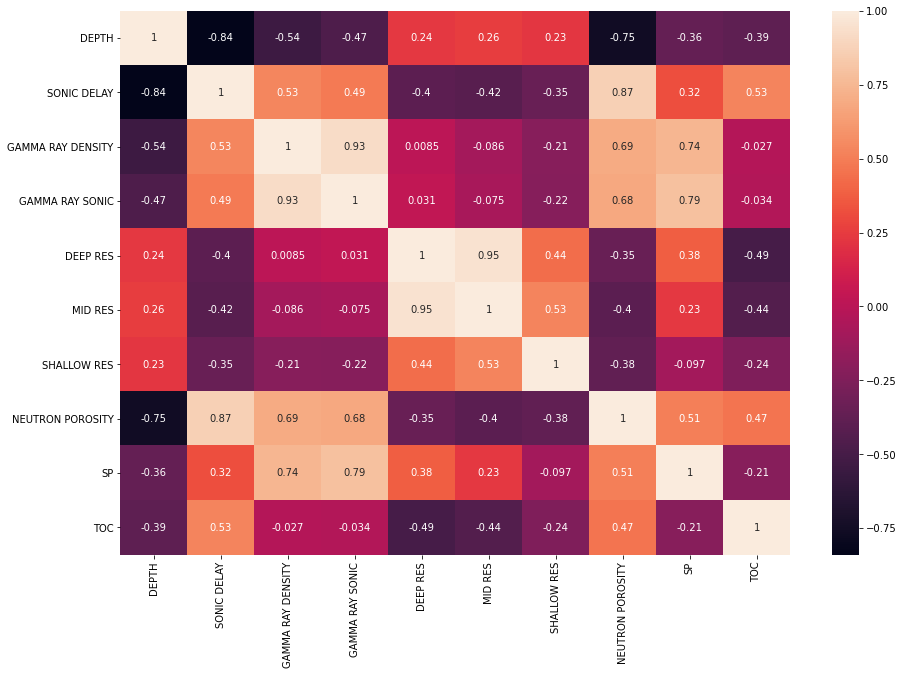

In [13]:
df1 = pd.read_excel('DATA.xlsx',dtype=np.longfloat)
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()
